<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/02_AlgebraLineal/05_Espacios_Vectoriales/05_Espacios_Vectoriales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Espacios Vectoriales

## Proyecto PAPIME PE101019

*   Autor: 
  - Jaime Jesús Ortega Ibarra
*   Rev: martes sep 17 01:18:31 CDT 2020




In [1]:
!git clone https://github.com/joiortega1/Prueba_lectura.git

Cloning into 'Prueba_lectura'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [2]:
import os
os.listdir('Prueba_lectura')

['gutils.zip', 'gutils.py', '.git']

In [3]:
import Prueba_lectura.gutils
import Prueba_lectura.gutils as vis
import numpy as np
import scipy.sparse as sp
import scipy.linalg as la
import math

**¿Alguna vez has visitado un Billar?**

Dentro de este juego, se debe golpear una bola con cierta fuerza y dirección, de tal manera que pueda trazar una ruta hacía otra bola con el objetivo de introducirla dentro de alguna tronera (Esquina de la mesa), pero ¿Qué es esto?, pues esto al tener más de un vector, cada uno con cierta dirección y sentido, pueden verse como un espacio vectorial.

### Introducción 
En álgebra abstracta, un espacio vectorial es una estructura algebraica creada a partir de un conjunto no vacío, una operación interna (llamada suma definida para los elementos del conjunto) y una operación externa (llamada producto por un escalar, definida entre dicho conjunto y otro conjunto, con estructura de cuerpo), con 8 propiedades fundamentales. A los elementos de un espacio vectorial se les llama vectores y a los elementos del cuerpo, escalares.

- Un espacio vectorial sobre un cuerpo  $K$ (como el cuerpo de los números reales o los números complejos) es un conjunto $V$  no vacío, dotado de dos operaciones para las cuales será cerrado:
\begin{equation}
Suma : VxV \rightarrow V
\end{equation}
\begin{equation}
(u,v) \rightarrow w=u+v
\end{equation}
Operación interna tal que contenga las siguientes propiedades:
  - Propiedad Conmutativa:
\begin{equation}
u+v = v+u,  
\end{equation}
\begin{equation}
\forall n,v \in V
\end{equation}
  - Propiedad Asociativa:
\begin{equation}
u+(u+w)=(u+v)+w, 
\end{equation}
\begin{equation}
\forall n,v,w \in V
\end{equation}
  - Exista el elemento neutro:
\begin{equation}
\exists e \in V:u+e=u,
\end{equation}
\begin{equation}
\forall u \in V
\end{equation}
  - Exista el elemento opuesto:
\begin{equation}
\forall u \in V, \exists -u \in V:u+(-u)=e
\end{equation}
Y tenga la operación productio por un escalar:
\begin{equation}
Proudcto: KxV \rightarrow V
\end{equation}
\begin{equation}
(a,u) \rightarrow v=a \cdot u
\end{equation}
operación externa tal que:
  - Tenga la propiedad Asociativa:
\begin{equation}
a \cdot (b \cdot u) = (a \cdot b) \cdot u
\end{equation}
\begin{equation}
\forall a,b \in K, \forall u \in V
\end{equation}
  - Exista el elemento neutro:
\begin{equation}
 \exists e \in K:e \cdot u = u,
\end{equation}
\begin{equation}
\forall u \in V
\end{equation}
  - Tenga la propiedad distributiva respecto de la suma vectorial:
\begin{equation}
a \cdot (u+v) = a \cdot u + a \cdot v,
\end{equation}
\begin{equation}
\forall a \in K, \forall u,v \in V
\end{equation}
  - Tenga la propiedad distributiva respecto de la suma escalar:
\begin{equation}
(a+b) \cdot u = a \cdot u + b \cdot u,
\end{equation}
\begin{equation}
\forall a,b \in K, \forall u \in V
\end{equation}

En la siguiente gráfica osbervaremos el vector [1,2]


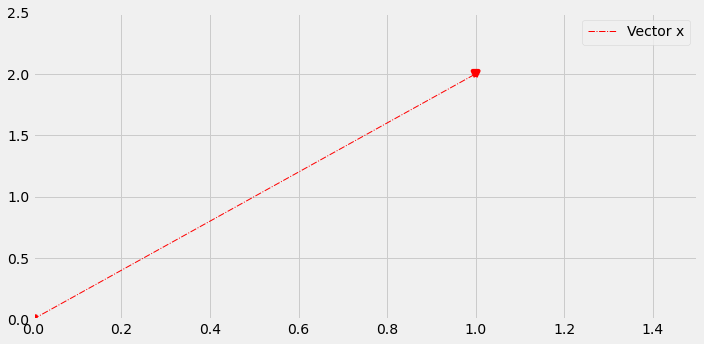

In [4]:
print('En la siguiente gráfica osbervaremos el vector [1,2]')
#Declaramos nuestro vector
x = [1,2]
#Graficamos
par = [{'ylim':(0,2.5), 'xlim':(0,1.5)}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=np.array([0, 1]), y=[0,2], par={'label':'Vector x', 'ls':'dashdot','lw':1, 'color':'red'})
graf.scatter(x=np.array([0, 1]), y=[0,2], par={'ls':'dashdot','lw':4, 'color':'red', 'marker':'v'})
graf.legend()
graf.show()

## Combinaciones lineales

Cuando trabajamos vectores, nos podemos encontrar con dos operaciones fundamentales, la suma y la multiplicación por escalares. Cuando sumamos dos vectores v y w, sumamos elemento por elemento, del siguiente modo:
\begin{equation}
v+w = \begin{bmatrix} v_1 \\ v_2 \\ . \\ .\\ . \\ v_n  \end{bmatrix} + 
\begin{bmatrix} w_1 \\ w_2 \\ . \\ . \\ . \\ w_n \end{bmatrix} =
\begin{bmatrix} v_1 + w_1 \\ v_2 + w_2 \\ . \\ . \\ . \\ v_n + w_n \end{bmatrix}
\end{equation}

En el siguiente código podemos ejemplificar lo dicho anteriormente.

No handles with labels found to put in legend.


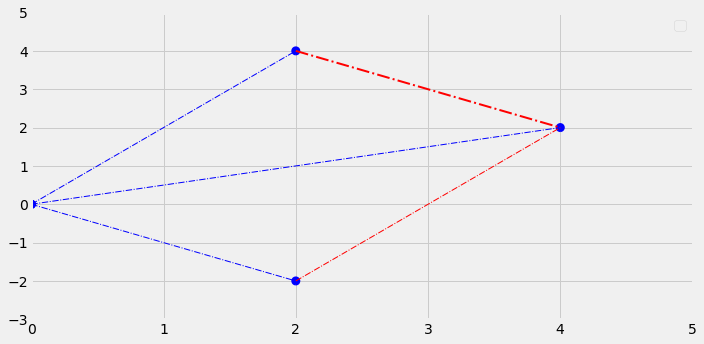

In [5]:
par = [{'ylim':(-3,5), 'xlim':(0,5)}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=np.array([0, 2]), y=[0, -2], par={'ls':'dashdot','lw':1, 'color':'blue'})
graf.scatter(x=np.array([0, 2]), y=[0, -2], par={'ls':'dashdot','lw':3, 'color':'blue'})
graf.plot(x=np.array([0, 2]), y=[0,4], par={'ls':'dashdot','lw':1, 'color':'blue'})
graf.scatter(x=np.array([0, 2]), y=[0,4], par={'ls':'dashdot','lw':3, 'color':'blue'})
graf.plot(x=np.array([0, 4]), y=[0,2], par={'ls':'dashdot','lw':1, 'color':'blue'})
graf.scatter(x=np.array([0, 4]), y=[0,2], par={'ls':'dashdot','lw':3, 'color':'blue'})
graf.plot(x=np.array([2, 4]), y=[-2,2], par={'ls':'dashdot','lw':1, 'color':'red'})
graf.plot(x=np.array([2, 4]), y=[4,2], par={'ls':'dashdot','lw':2, 'color':'red'})
graf.legend()
graf.show()

## Transformaciones Lineales
Una transformación lineal es una función que tiene como dominio y codominio un espacio vectorial los cuales conservan las propiedades de linealidad. Tenemos dos espacios vectoriales $V$ y $W$, y una función que va de $V$ a $W$. O sea una regla de asignación que transforma vectores de $V$ en vectores de $W$. Pero no toda función que transforme vectores de $V$ en vectores de $W$ es una transformación lineal. Debe cumplir ciertas condiciones:

$$F: V \rightarrow W$$ es una transformación lienal si y sólo si:
1. Abre sumas $$F(u+v)=F(u)+F(v)$$ $$\forall u,v \in V$$

2. Saca escalares $$F(k \cdot v)= k \cdot F(v)$$ $$\forall v \in V, \forall k \in \mathbb R$$

En el siugiente ejemplo podemos observar una transformación lineal


In [6]:
#Declaramos nuestra matriz A con ayuda de un arreglo de Numpy
A = np.array([[-1,3],[2, -2]])
print('Matriz:\n', A, '\n')
#Declaramso nuestro vector
vector = np.array([[2], [1]])
print('Vector: \n', vector, '\n')
print(vector.flatten())

Matriz:
 [[-1  3]
 [ 2 -2]] 

Vector: 
 [[2]
 [1]] 

[2 1]


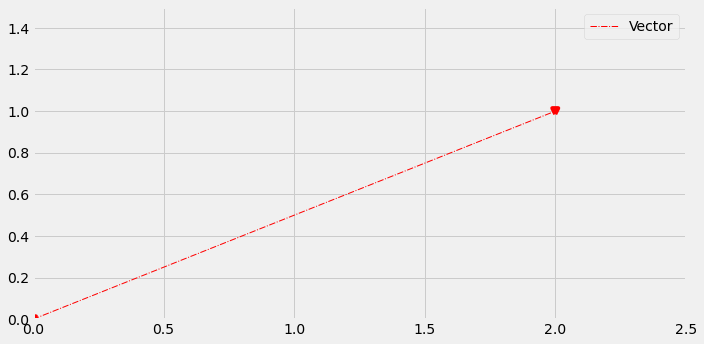

In [7]:
par = [{'ylim':(0,1.5), 'xlim':(0,2.5)}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=np.array([0, 2]), y=[0,1], par={'label':'Vector', 'ls':'dashdot','lw':1, 'color':'red'})
graf.scatter(x=np.array([0, 2]), y=[0,1], par={'ls':'dashdot','lw':4, 'color':'red','marker':'v'})
graf.legend()
graf.show()

Vector transformado [1 2]


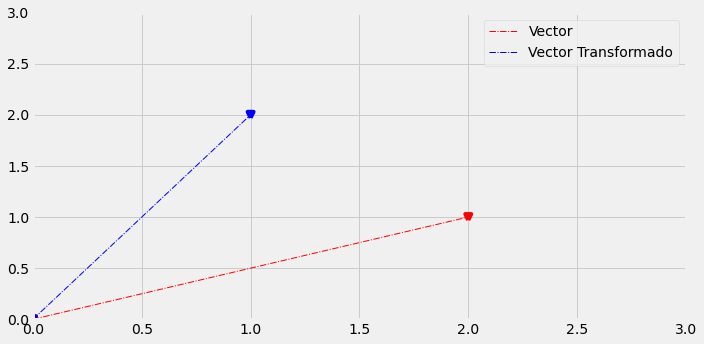

In [8]:
A.dot(vector)
#Con la ayuda de la función dot(), podemos obtener el vector transformado
vector_transformado = A.dot(vector)
#Imprimimos el vector
print('Vector transformado',vector_transformado.flatten())
#Graficamos
par = [{'ylim':(0,3), 'xlim':(0,3)}]

graf = vis.planoCartesiano(par=par)
graf.plot(x=np.array([0, 2]), y=[0,1], par={'label':'Vector', 'ls':'dashdot','lw':1, 'color':'red'})
graf.scatter(x=np.array([0, 2]), y=[0,1], par={'ls':'dashdot','lw':4, 'color':'red','marker':'v'})
graf.plot(x=np.array([0, 1]), y=[0,2], par={'label':'Vector Transformado', 'ls':'dashdot','lw':1, 'color':'blue'})
graf.scatter(x=np.array([0, 1]), y=[0,2], par={'ls':'dashdot','lw':4, 'color':'blue','marker':'v'})
graf.legend()
graf.show()

## Espacios y Subespacios
De acuerdo con las propiedades vistas inicialmente, se puede afirmar que $\mathbb R^3$ es un espacio vectorial, por lo que podemos definir un subespacio vectorial de la siguiente manera:\
Sea $V$ un espacio vectorial y $W$ un subconjunto no vacío de $V$.\
$W$ es un subespacio de $V$ si $W$ es en sí mismo un espacio vectorial con las mismas operaciones (suma de vectores y producto por un escalar) definidas en $V$, es decir:\
i) $$0 \in W$$
ii) $$\forall u,v \in W, u+v \in W$$
iii) $$\forall u \in U, \forall k \in K, ku \in U $$


### Ejemplo

Una matriz triangular superior es aquella que cualquier elemento debajo de la diagonal es igual a 0, por lo cual se cumple la primer propiedad anteriormente mencionada.

$S=${ $A \in M^nxn$| $aij=0$ con $i>j$}
\begin{equation}
A = \begin{bmatrix} a, b \\ 0, c \end{bmatrix}
\end{equation}
Sea otra matriz 
\begin{equation}
B = \begin{bmatrix} d, f \\ 0, g \end{bmatrix}
\end{equation}
Sabiendo que $a,$ $b,$ $c,$ $d,$ $e,$ $f$ $\in \mathbb R$

Por lo que al sumar ambas matrices
\begin{equation}
A + B = \begin{bmatrix} a + d, b + f \\ 0 + 0, c + g \end{bmatrix}
\end{equation}
Obtenemos de igual manera una matriz triangular superior, cumpliendo así la segunda propiedad, mientras que al ser multiplicada dicha matriz por un escalar.
\begin{equation}
K . A = \begin{bmatrix} Ka, Kb \\ K0, Kc \end{bmatrix}
\end{equation}
El producto del escalar por 0, sigue siento 0 por lo cual dicho producto sigue siendu una matriz triangular superior, cumpliendo así la tercera propiedad.

# Referencias
Para mayor aprendizaje, se recomienda al lector visitar las diversas fuentes de donde se obtuvo la información anterior:
- https://www.educaplus.org/movi/1_4sumavector.html \
- http://euclides.us.es/da/apuntes/alige/alige-I-4.pdf
- https://sites.google.com/site/sistemasalgebralineal/unidad-4---espacios-vectoriales/definicion-de-espacio-vectorial